In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
data = pd.read_csv("./Arthritis.csv")

In [4]:
data.head()

,Year,Population,Chronic Disease Patient Count,Mortality Rate Count,Recovery / Management Count,Pollution Level,Health Index,Education Index,Average Income Level,Average BMI,Healthcare Access Rate,"Average Smokers (per 100,000)","Average Alcohol Consumers (per 100,000)"
0,1901,3000000,30000,270,9000,20.0,100.00,34.000,2000,22.00,50.0,5000,3000
1,1902,3090000,30900,278,9270,20.1,99.73,34.005,2060,22.02,50.2,4980,3010
2,1903,3182700,31827,286,9548,20.2,99.46,34.010,2121,22.04,50.4,4960,3020
3,1904,3278181,32781,295,9834,20.3,99.19,34.015,2185,22.06,50.6,4940,3030
4,1905,3376526,33765,303,10129,20.4,98.92,34.020,2251,22.08,50.8,4920,3040


In [5]:
data.tail()

,Year,Population,Chronic Disease Patient Count,Mortality Rate Count,Recovery / Management Count,Pollution Level,Health Index,Education Index,Average Income Level,Average BMI,Healthcare Access Rate,"Average Smokers (per 100,000)","Average Alcohol Consumers (per 100,000)"
196,2097,984503573,9845035,88605,2953510,39.6,47.08,34.980,656335,25.92,89.2,1080,4960
197,2098,1014038680,10140386,91263,3042116,39.7,46.81,34.985,676025,25.94,89.4,1060,4970
198,2099,1044459841,10444598,94001,3133379,39.8,46.54,34.990,696306,25.96,89.6,1040,4980
199,2100,1075793636,10757936,96821,3227380,39.9,46.27,34.995,717195,25.98,89.8,1020,4990
200,2101,1108067445,11080674,99726,3324202,40.0,46.00,35.000,738711,26.00,90.0,1000,5000


In [6]:
data.shape

(201, 13)

In [7]:
data.isnull().sum()

Year                                       0
Population                                 0
Chronic Disease Patient Count              0
Mortality Rate Count                       0
Recovery / Management Count                0
Pollution Level                            0
Health Index                               0
Education Index                            0
Average Income Level                       0
Average BMI                                0
Healthcare Access Rate                     0
Average Smokers (per 100,000)              0
Average Alcohol Consumers (per 100,000)    0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,201.0,2.001000e+03,5.816786e+01,1901.0,1951.00,2001.0,2.051000e+03,2.101000e+03
Population,201.0,1.887744e+08,2.667022e+08,3000000.0,13151718.00,57655895.0,2.527580e+08,1.108067e+09
Chronic Disease Patient Count,201.0,1.887743e+06,2.667022e+06,30000.0,131517.00,576558.0,2.527580e+06,1.108067e+07
Mortality Rate Count,201.0,1.698923e+04,2.400317e+04,270.0,1183.00,5189.0,2.274800e+04,9.972600e+04
Recovery / Management Count,201.0,5.663227e+05,8.001067e+05,9000.0,39455.00,172967.0,7.582740e+05,3.324202e+06
Pollution Level,201.0,3.000000e+01,5.816786e+00,20.0,25.00,30.0,3.500000e+01,4.000000e+01
Health Index,201.0,7.300000e+01,1.570532e+01,46.0,59.50,73.0,8.650000e+01,1.000000e+02
Education Index,201.0,3.450000e+01,2.908393e-01,34.0,34.25,34.5,3.475000e+01,3.500000e+01
Average Income Level,201.0,1.258491e+05,1.778015e+05,2000.0,8767.00,38437.0,1.685050e+05,7.387110e+05
Average BMI,201.0,2.400000e+01,1.163357e+00,22.0,23.00,24.0,2.500000e+01,2.600000e+01


In [9]:
# Creating the features (X) and target (y) variables
%time
X = data['Year'].values.reshape(-1, 1)
y = data['Chronic Disease Patient Count'].values

CPU times: user 5 μs, sys: 3 μs, total: 8 μs
Wall time: 15.5 μs


In [10]:
%time
model = LinearRegression()
model.fit(X, y)

CPU times: user 5 μs, sys: 2 μs, total: 7 μs
Wall time: 14.8 μs


LinearRegression()

In [11]:
# Predict for training data
%time
y_pred = model.predict(X)
y_pred

CPU times: user 6 μs, sys: 3 μs, total: 9 μs
Wall time: 19.3 μs


array([-1.88006610e+06, -1.84238800e+06, -1.80470991e+06, -1.76703182e+06,
       -1.72935372e+06, -1.69167563e+06, -1.65399754e+06, -1.61631944e+06,
       -1.57864135e+06, -1.54096326e+06, -1.50328516e+06, -1.46560707e+06,
       -1.42792898e+06, -1.39025088e+06, -1.35257279e+06, -1.31489470e+06,
       -1.27721660e+06, -1.23953851e+06, -1.20186042e+06, -1.16418232e+06,
       -1.12650423e+06, -1.08882614e+06, -1.05114804e+06, -1.01346995e+06,
       -9.75791856e+05, -9.38113762e+05, -9.00435669e+05, -8.62757575e+05,
       -8.25079482e+05, -7.87401389e+05, -7.49723295e+05, -7.12045202e+05,
       -6.74367108e+05, -6.36689015e+05, -5.99010922e+05, -5.61332828e+05,
       -5.23654735e+05, -4.85976641e+05, -4.48298548e+05, -4.10620454e+05,
       -3.72942361e+05, -3.35264268e+05, -2.97586174e+05, -2.59908081e+05,
       -2.22229987e+05, -1.84551894e+05, -1.46873801e+05, -1.09195707e+05,
       -7.15176137e+04, -3.38395203e+04,  3.83857310e+03,  4.15166665e+04,
        7.91947599e+04,  

In [12]:
# Print evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1213982.775048521
Mean Squared Error (MSE): 2298170400424.0107
Root Mean Squared Error (RMSE): 1515971.7676869878
R-squared (R²): 0.6752905424731783


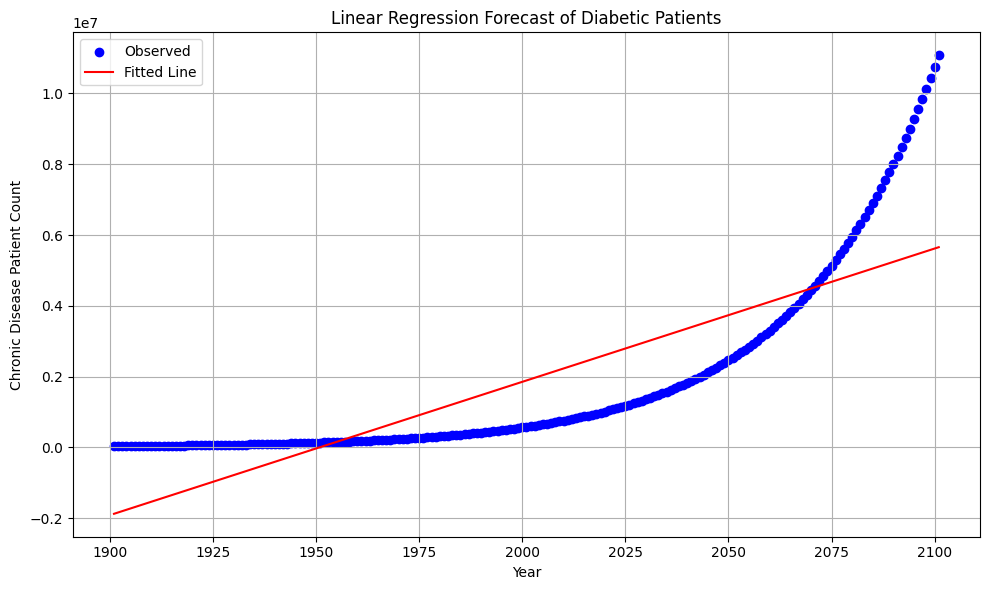

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Chronic Disease Patient Count'], color='blue', label='Observed')
plt.plot(data['Year'], y_pred, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Chronic Disease Patient Count')
plt.title('Linear Regression Forecast of Diabetic Patients')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Predict future values
%time
future_years = np.array([1966, 1967, 1968, 1969, 1970]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])

CPU times: user 3 μs, sys: 2 μs, total: 5 μs
Wall time: 11 μs


In [16]:
# Predict future values
%time
future_years = np.array([2031, 2032, 2033, 2034, 2035]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])
future_predictions

CPU times: user 5 μs, sys: 3 μs, total: 8 μs
Wall time: 16 μs


array([3018086.0461897 , 3055764.13960332, 3093442.23301694,
       3131120.32643056, 3168798.41984418])

In [18]:
#Predict future values
%time
future_years = np.array([2041, 2042, 2043, 2044, 2045]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])
future_predictions

CPU times: user 6 μs, sys: 2 μs, total: 8 μs
Wall time: 17.2 μs


array([3394866.98032589, 3432545.07373951, 3470223.16715313,
       3507901.26056676, 3545579.35398038])

In [19]:
while True:
    try:
        year = int(input("Please enter the year to predict: "))
        # Predict future value
        future_years = np.array([year]).reshape(-1, 1)
        future_predictions = model.predict(future_years)

        # Combine historical and future predictions
        future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
        combined_data = pd.concat([data, future_data.set_index('Year')])
        # Print prediction
        print(f"Predicted number of diabetic patients in {year}: {future_predictions[0]:.0f}")
        choice = input("Would you like to predict again? (Y/N): ")
        if choice.lower() == "y":
            continue
        else:
            break
    except ValueError:
        print("Please enter a valid integer year.")

Please enter the year to predict:  2052


Predicted number of diabetic patients in 2052: 3809326


Would you like to predict again? (Y/N):  Y
Please enter the year to predict:  2052


Predicted number of diabetic patients in 2052: 3809326


Would you like to predict again? (Y/N):  Y
Please enter the year to predict:  2053


Predicted number of diabetic patients in 2053: 3847004


Would you like to predict again? (Y/N):  n


In [20]:
from joblib import dump
dump(model, 'Functionality_1.joblib')

['Functionality_1.joblib']

In [21]:
end_time = time.time()
print(f"Total Wall Time: {end_time - start_time:.2f} seconds")

Total Wall Time: 1449.91 seconds


In [22]:
#terminated